# Diabetes Prediction using Naive Bayes

In this notebook, we'll create a Naive Bayes model to predict diabetes based on various health metrics. We'll use the following steps:
1. Load and explore the data
2. Preprocess the dataset
3. Split the data into training and testing sets
4. Train a Naive Bayes classifier
5. Evaluate the model's performance

In [18]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('../diabetes.csv')

# Display the first few rows and basic information about the dataset
print("First few rows of the dataset:")
display(df.head())

print("\nDataset information:")
print(df.info())

First few rows of the dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


Missing values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Basic statistics of the dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


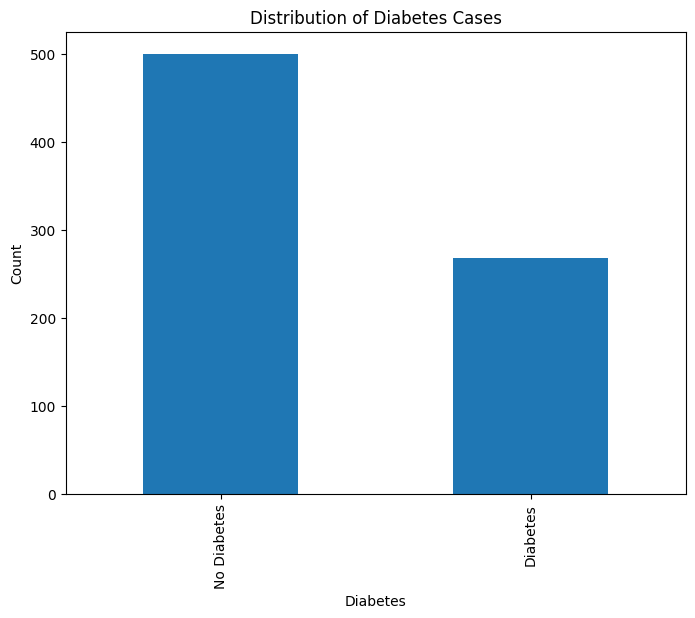

In [19]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Basic statistics of the dataset
print("\nBasic statistics of the dataset:")
display(df.describe())

# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
df['Outcome'].value_counts().plot(kind='bar')
plt.title('Distribution of Diabetes Cases')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()

# Data Preprocessing: Normalization

Before training the model, we should normalize our features because:
1. Features are on different scales (e.g., Age vs Glucose vs BMI)
2. Naive Bayes assumes that features are normally distributed (Gaussian)
3. Normalization can help improve model performance by giving equal weight to all features

In [20]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Normalize the features
X_normalized = scaler.fit_transform(X)

# Convert back to DataFrame to maintain column names
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)

# Display the first few rows of normalized data
print("First few rows of normalized data:")
display(X_normalized.head())

# Show basic statistics of normalized data
print("\nBasic statistics of normalized data:")
display(X_normalized.describe())

First few rows of normalized data:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496



Basic statistics of normalized data:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-6.476301e-17,-9.251859e-18,1.503427e-17,1.006140e-16,-3.006854e-17,2.590520e-16,2.451743e-16,1.931325e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-3.783654e+00,-3.572597e+00,-1.288212e+00,-6.928906e-01,-4.060474e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.928906e-01,-5.955785e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.218877e-01,1.496408e-01,1.545332e-01,-4.280622e-01,9.419788e-04,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.057709e-01,5.632228e-01,7.190857e-01,4.120079e-01,5.847705e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.444478e+00,2.734528e+00,4.921866e+00,6.652839e+00,4.455807e+00,5.883565e+00,4.063716e+00


Training set shape: (614, 8)
Testing set shape: (154, 8)

Model Accuracy: 76.62%

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



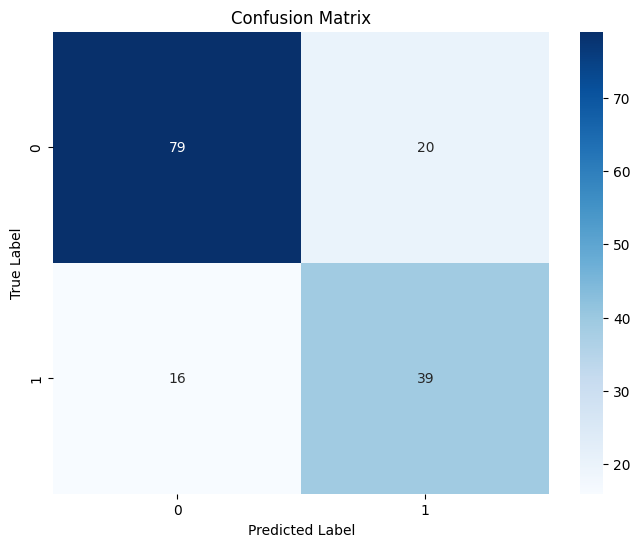

In [21]:
# Split the normalized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Create and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy: {:.2f}%".format(accuracy * 100))

# Display detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

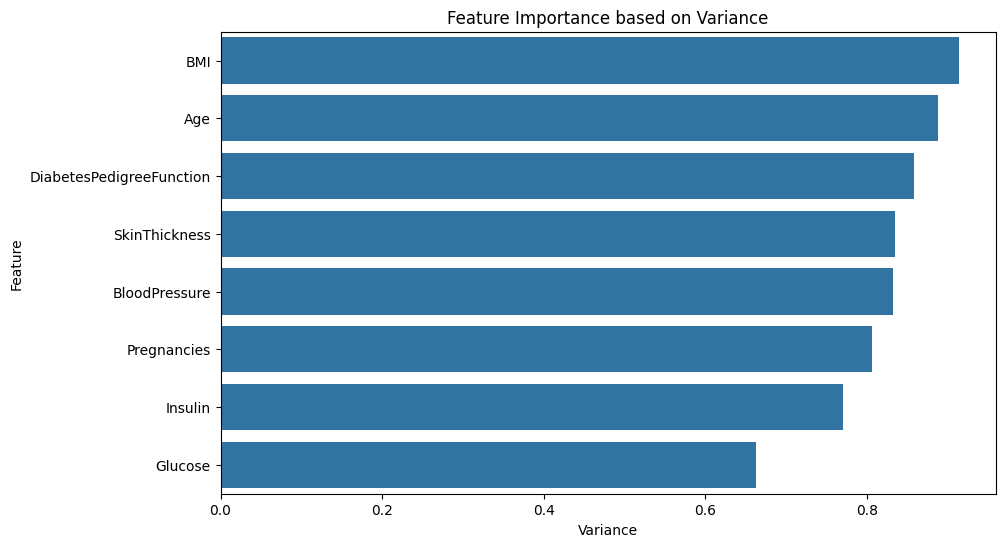

In [22]:
# Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Variance': nb_model.var_[0],  # Using variance as a measure of feature importance
})
feature_importance = feature_importance.sort_values('Variance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Variance', y='Feature')
plt.title('Feature Importance based on Variance')
plt.xlabel('Variance')
plt.ylabel('Feature')
plt.show()

# Making Predictions with the Model

Now that we have trained our Naive Bayes model, let's see how to use it to make predictions for new patients. We'll demonstrate this with both single and multiple patient data.

In [23]:
# Example 1: Predicting for a single patient
# Create sample data for one patient
single_patient = pd.DataFrame({
    'Pregnancies': [6],
    'Glucose': [148],
    'BloodPressure': [72],
    'SkinThickness': [35],
    'Insulin': [0],
    'BMI': [33.6],
    'DiabetesPedigreeFunction': [0.627],
    'Age': [50]
})

# Normalize the input data
single_patient_normalized = scaler.transform(single_patient)

# Make prediction
prediction = nb_model.predict(single_patient_normalized)
probability = nb_model.predict_proba(single_patient_normalized)

print("Prediction for single patient:")
print("Diabetes Status:", "Diabetic" if prediction[0] == 1 else "Non-diabetic")
print("Probability of being diabetic: {:.2f}%".format(probability[0][1] * 100))

Prediction for single patient:
Diabetes Status: Diabetic
Probability of being diabetic: 73.47%


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [24]:
# Example 2: Predicting for multiple patients
# Create sample data for multiple patients
multiple_patients = pd.DataFrame({
    'Pregnancies': [1, 8, 1],
    'Glucose': [85, 183, 89],
    'BloodPressure': [66, 64, 66],
    'SkinThickness': [29, 0, 23],
    'Insulin': [0, 0, 94],
    'BMI': [26.6, 23.3, 28.1],
    'DiabetesPedigreeFunction': [0.351, 0.672, 0.167],
    'Age': [31, 32, 21]
})

# Normalize the input data
multiple_patients_normalized = scaler.transform(multiple_patients)

# Make predictions
predictions = nb_model.predict(multiple_patients_normalized)
probabilities = nb_model.predict_proba(multiple_patients_normalized)

# Display results
print("\nPredictions for multiple patients:")
for i in range(len(predictions)):
    print(f"\nPatient {i+1}:")
    print("Diabetes Status:", "Diabetic" if predictions[i] == 1 else "Non-diabetic")
    print("Probability of being diabetic: {:.2f}%".format(probabilities[i][1] * 100))

# Create a results DataFrame
results_df = pd.DataFrame({
    'Patient': range(1, len(predictions) + 1),
    'Prediction': ["Diabetic" if pred == 1 else "Non-diabetic" for pred in predictions],
    'Probability_of_Diabetes': [prob[1] * 100 for prob in probabilities]
})

print("\nSummary of predictions:")
display(results_df)


Predictions for multiple patients:

Patient 1:
Diabetes Status: Non-diabetic
Probability of being diabetic: 2.18%

Patient 2:
Diabetes Status: Diabetic
Probability of being diabetic: 79.22%

Patient 3:
Diabetes Status: Non-diabetic
Probability of being diabetic: 1.42%

Summary of predictions:


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


,Patient,Prediction,Probability_of_Diabetes
0,1,Non-diabetic,2.184989
1,2,Diabetic,79.224178
2,3,Non-diabetic,1.422419


In [25]:
# Function to make predictions for new patient data
def predict_diabetes(patient_data):
    """
    Make diabetes prediction for new patient data
    
    Parameters:
    patient_data (dict): Dictionary containing patient information with the following keys:
                        'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                        'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'
    
    Returns:
    tuple: (prediction, probability of diabetes)
    """
    # Convert dictionary to DataFrame
    df = pd.DataFrame([patient_data])
    
    # Normalize the input data using the same scaler
    df_normalized = scaler.transform(df)
    
    # Make prediction
    prediction = nb_model.predict(df_normalized)[0]
    probability = nb_model.predict_proba(df_normalized)[0][1]
    
    return prediction, probability

# Example usage of the function
new_patient = {
    'Pregnancies': 2,
    'Glucose': 130,
    'BloodPressure': 70,
    'SkinThickness': 25,
    'Insulin': 95,
    'BMI': 25.5,
    'DiabetesPedigreeFunction': 0.45,
    'Age': 35
}

prediction, probability = predict_diabetes(new_patient)
print("\nPrediction using the helper function:")
print("Diabetes Status:", "Diabetic" if prediction == 1 else "Non-diabetic")
print("Probability of being diabetic: {:.2f}%".format(probability * 100))


Prediction using the helper function:
Diabetes Status: Non-diabetic
Probability of being diabetic: 8.65%


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
